Integrantes:
Camilo Casanova
Francisco Espinoza
Matias Gutierrez
José Ignacio Jiménez
Miguel Jiménez  

In [ ]:
#Hubo outliers en el número de casos semanales en la comuna de las condes? 
#Dibuje el boxplot y utilice el código en el notebook para dar la lista de outliers.

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [160]:
Datos = pd.read_csv("C:/Users/Jojim/Desktop/Covid-19.csv") #Obtención de datos

In [161]:
casosRM=Datos[Datos["Region"]=="Metropolitana"] #Filtrar por region metropolitana
casosRM.drop("Tasa",axis=1,inplace=True) #Eliminar columna "tasa"

C:\Users\Jojim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [162]:
casosRM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-10-25,2021-10-29,2021-11-01,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,812.0,813.0,813.0,815.0,820.0,823.0,822.0,825.0,826.0,827.0
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11190.0,11283.0,11339.0,11397.0,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2582.0,2608.0,2628.0,2653.0,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8758.0,8814.0,8854.0,8884.0,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,18774.0,18872.0,18961.0,19056.0,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0
93,Metropolitana,13,Colina,13301.0,180353.0,32.0,39.0,47.0,50.0,62.0,...,15915.0,16012.0,16081.0,16155.0,16241.0,16352.0,16420.0,16496.0,16530.0,16615.0
94,Metropolitana,13,Conchali,13104.0,139195.0,14.0,18.0,22.0,32.0,38.0,...,15206.0,15287.0,15356.0,15431.0,15517.0,15618.0,15689.0,15766.0,15810.0,15871.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,5.0,5.0,5.0,8.0,9.0,...,4040.0,4066.0,4090.0,4117.0,4142.0,4171.0,4193.0,4221.0,4240.0,4257.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,18.0,28.0,35.0,37.0,46.0,...,22268.0,22367.0,22439.0,22534.0,22616.0,22763.0,22832.0,22909.0,22968.0,23064.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,5.0,7.0,...,4164.0,4203.0,4230.0,4234.0,4244.0,4265.0,4295.0,4315.0,4329.0,4348.0


In [163]:
casosmelt=casosRM.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna","Poblacion"],var_name="fecha") 

#Reestructuración base de datos en donde un DataFrame se transforma en un formato en el que las columnas región, 
#codigo region, comuna, Codigo comuna y poblacion se consideran "id_vars", mientras que todas las demás columnas,
#consideradas variables medidas (value_vars), permitiendo mejor manipulación de la base.

In [164]:
casosmelt

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fecha,value
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-30,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-30,7.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-30,6.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-30,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-30,19.0
...,...,...,...,...,...,...,...
9323,Metropolitana,13,Santiago,13101.0,503147.0,2021-11-26,49424.0
9324,Metropolitana,13,Talagante,13601.0,81838.0,2021-11-26,6063.0
9325,Metropolitana,13,Tiltil,13303.0,21477.0,2021-11-26,2104.0
9326,Metropolitana,13,Vitacura,13132.0,96774.0,2021-11-26,6050.0


In [165]:
casosmelt.drop("Codigo region",axis=1,inplace=True) #Eliminar columna "Codigo region"
casosmelt.drop("Codigo comuna",axis=1,inplace=True) #Eliminar columna "Codigo comuna"
casosmelt.drop("Poblacion",axis=1,inplace=True) #Eliminar columna "Poblacion"

In [166]:
casosmelt

,Region,Comuna,fecha,value
0,Metropolitana,Alhue,2020-03-30,0.0
1,Metropolitana,Buin,2020-03-30,7.0
2,Metropolitana,Calera de Tango,2020-03-30,6.0
3,Metropolitana,Cerrillos,2020-03-30,0.0
4,Metropolitana,Cerro Navia,2020-03-30,19.0
...,...,...,...,...
9323,Metropolitana,Santiago,2021-11-26,49424.0
9324,Metropolitana,Talagante,2021-11-26,6063.0
9325,Metropolitana,Tiltil,2021-11-26,2104.0
9326,Metropolitana,Vitacura,2021-11-26,6050.0


In [167]:
casosmelt["fecha"]=pd.to_datetime(casosmelt["fecha"])  #Convierte argumento fecha en Datatime

In [168]:
casossum=casosmelt.groupby("Comuna").resample("W-Mon",on="fecha").sum().reset_index().sort_values(by="fecha")
casossum
#Se agrupan los casos por comunas dentro de una misma fecha (sumando cantidad de casos por comuna)

,Comuna,fecha,value
0,Alhue,2020-03-30,0.0
2904,Penaflor,2020-03-30,10.0
1760,Lampa,2020-03-30,10.0
4400,Talagante,2020-03-30,0.0
4576,Vitacura,2020-03-30,83.0
...,...,...,...
3607,Quinta Normal,2021-11-29,18017.0
967,El Monte,2021-11-29,4348.0
3695,Recoleta,2021-11-29,20439.0
3079,Penalolen,2021-11-29,34490.0


In [176]:
casos_LC=casossum[casossum["Comuna"]=="Las Condes"] # Se filtró por la comuna de Las condes
casos_LC

,Comuna,fecha,value
1848,Las Condes,2020-03-30,181.0
1849,Las Condes,2020-04-06,690.0
1850,Las Condes,2020-04-13,843.0
1851,Las Condes,2020-04-20,952.0
1852,Las Condes,2020-04-27,701.0
...,...,...,...
1931,Las Condes,2021-11-01,42342.0
1932,Las Condes,2021-11-08,42983.0
1933,Las Condes,2021-11-15,43601.0
1934,Las Condes,2021-11-22,43995.0


In [177]:
casos_LC["casosACT"]=casos_LC["value"]-casos_LC["value"].shift() #Agraca columna casosact correspondiente a
                                                                 #la diferencia entre los acumulados ese dia 
                                                                 #y el anterior para obtener los nuevos actuales

<ipython-input-177-b36badc610c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_LC["casosACT"]=casos_LC["value"]-casos_LC["value"].shift() #Agraca columna casosact correspondiente a


In [178]:
casosFin=casos_LC[casos_LC["casosACT"]>0].reset_index() #reset index base original con uno nuevo para esta
casosFin

,index,Comuna,fecha,value,casosACT
0,1849,Las Condes,2020-04-06,690.0,509.0
1,1850,Las Condes,2020-04-13,843.0,153.0
2,1851,Las Condes,2020-04-20,952.0,109.0
3,1853,Las Condes,2020-05-04,886.0,185.0
4,1854,Las Condes,2020-05-11,1364.0,478.0
...,...,...,...,...,...
79,1930,Las Condes,2021-10-25,41549.0,642.0
80,1931,Las Condes,2021-11-01,42342.0,793.0
81,1932,Las Condes,2021-11-08,42983.0,641.0
82,1933,Las Condes,2021-11-15,43601.0,618.0


In [179]:
casosFin.drop("index",axis=1,inplace=True) #Eliminar columna "index" antigua
casosFin.drop("value",axis=1,inplace=True)#Eliminar columna "value"
casosFin

,Comuna,fecha,casosACT
0,Las Condes,2020-04-06,509.0
1,Las Condes,2020-04-13,153.0
2,Las Condes,2020-04-20,109.0
3,Las Condes,2020-05-04,185.0
4,Las Condes,2020-05-11,478.0
...,...,...,...
79,Las Condes,2021-10-25,642.0
80,Las Condes,2021-11-01,793.0
81,Las Condes,2021-11-08,641.0
82,Las Condes,2021-11-15,618.0


<AxesSubplot:xlabel='fecha', ylabel='casosACT'>

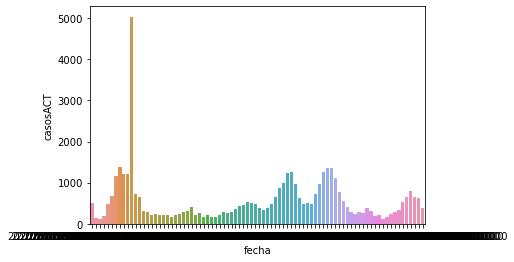

In [153]:
sns.barplot(x="fecha", y="casosACT",data=casosFin) #Crea grafico usando casosFin limpios paraencontrar respuesta a pregunta

In [154]:
Outlier=casos_LC[casos_LC["casosACT"]>3000] #entrega el caso atipico buscado

In [155]:
Outlier

,Comuna,fecha,value,casosACT
1861,Las Condes,2020-06-29,9225.0,5033.0


In [ ]:
#Finalmente encontramos que el Outlier correspondiente a la comuna de las condes el dia 29 de junio, 2020 con un valor de 5033 casos